# Advanced Applications of Mutate

## DRY and many transformations

In [57]:
import polars as pl

## Data set

We will be using two of the data sets provided by the Museam of Modern Art (MoMA) in this lecture.  Make sure that you have downloaded each repository.  [Download Instructions](./get_MOMA_data.ipynb)

In [58]:
exhibitions = pl.read_csv('./data/MoMAExhibitions1929to1989.csv', infer_schema_length=10000)

exhibitions

ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ExhibitionRoleinPressRelease,ConstituentID,ConstituentType,DisplayName,AlphaSort,FirstName,MiddleName,LastName,Suffix,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
i64,str,str,str,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,i64,i64,str,str,i64,str,i64,str
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Curator""","""Director""",9168,"""Individual""","""Alfred H. Barr, Jr.""","""Barr Alfred H. Jr.""","""Alfred""","""H.""","""Barr""","""Jr.""",null,"""American""",1902,1981,"""American, 1902ñ1981""","""Male""",109252853,"""Q711362""",500241556,"""moma.org/artists/9168"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",1053,"""Individual""","""Paul CÈzanne""","""CÈzanne Paul""","""Paul""",null,"""CÈzanne""",null,null,"""French""",1839,1906,"""French, 1839ñ1906""","""Male""",39374836,"""Q35548""",500004793,"""moma.org/artists/1053"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",2098,"""Individual""","""Paul Gauguin""","""Gauguin Paul""","""Paul""",null,"""Gauguin""",null,null,"""French""",1848,1903,"""French, 1848ñ1903""","""Male""",27064953,"""Q37693""",500011421,"""moma.org/artists/2098"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",2206,"""Individual""","""Vincent van Gogh""","""Gogh Vincent van""","""Vincent""",null,"""van Gogh""",null,null,"""Dutch""",1853,1890,"""Dutch, 1853ñ1890""","""Male""",9854560,"""Q5582""",500115588,"""moma.org/artists/2206"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",5358,"""Individual""","""Georges-Pierre Seurat""","""Seurat Georges-Pierre""","""Georges-Pierre""",null,"""Seurat""",null,null,"""French""",1859,1891,"""French, 1859ñ1891""","""Male""",24608076,"""Q34013""",500008873,"""moma.org/artists/5358"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
288,"""1536""","""Recent Japanese Posters from t…","""[MoMA Exh. #1536, December 9, …","""12/9/89""","""4/16/90""",1767.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",6215,"""Individual""","""Aijiro Wakita""","""Wakita Aijiro""","""Aijiro""",null,"""Wakita""",null,null,"""Japanese""",1942,null,"""Japanese, born 1942""","""Male""",18484958,null,null,"""moma.org/artists/6215"""
288,"""1536""","""Recent Japanese Posters from t…","""[MoMA Exh. #1536, December 9, …","""12/9/89""","""4/16/90""",1767.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",6486,"""Individual""","""Yoji Yamamoto""","""Yamamoto Yoji""","""Yoji""",null,"""Yamamoto""",null,null,"""Japanese""",1943,null,"""Japanese, born 1943""","""Male""",null,null,null,"""moma.org/artists/6486"""
288,"""1536""","""Recent Japanese Posters from t…","""[MoMA Exh. #1536, December 9, …","""12/9/89""","""4/16/90""",1767.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",6487,"""Individual""","""Ryuichi Yamashiro""","""Yamashiro Ryuichi""","""Ryuichi""",null,"""Yamashiro""",null,null,"""Japanese""",1920,null,"""Japanese, born 1920""","""Male""",119202488,"""Q2178400""",null,"""moma.org/artists/6487"""


## The DRY principle

* DRY == *D*on't *R*epeat *Y*ourself
* Be sure to
    * Look for repeated patterns
    * Abstract the patterns

#### Example - one-hot: Creating indicator columns

The [one-hot](https://en.wikipedia.org/wiki/One-hot) transformation 
1. involves making an indicator column for each unique label, and
2. Is a common method for preparing categorical data for ML.

In [60]:
# Making an American indicator using `.alias`
(exhibitions
 .select(pl.col('Nationality'))
 .with_columns((pl.when(pl.col('Nationality') == 'American')
                .then(pl.lit(1))
                .otherwise(pl.lit(0))
                .alias('American')
               )
              )
) 

Nationality,American
str,i32
"""American""",1
"""French""",0
"""French""",0
"""Dutch""",0
"""French""",0
…,…
"""Japanese""",0
"""Japanese""",0
"""Japanese""",0


## A WET transformation - Positional arguments

This solution is WET, not DRY, as all 7 of the expressions in mutate are very similar ... if only here was a way to perform these similar expressions all at once ...

In [61]:
# Using positional arguments w/ an alias
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(pl.when(pl.col('ExhibitionRole') == 'Curator').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Curator'),         
               pl.when(pl.col('ExhibitionRole') == 'Artist').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Artist'),          
               pl.when(pl.col('ExhibitionRole') == 'Arranger').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Arranger'),        
               pl.when(pl.col('ExhibitionRole') == 'Installer').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Installer'),       
               pl.when(pl.col('ExhibitionRole') == 'Competition Judge').then(pl.lit(1)).otherwise(pl.lit(0)).alias('CompetitionJudge'),
               pl.when(pl.col('ExhibitionRole') == 'Designer').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Designer'),        
               pl.when(pl.col('ExhibitionRole') == 'Prepare').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Preparer'))
 .head(5)
)
                                                    

ExhibitionRole,Curator,Artist,Arranger,Installer,CompetitionJudge,Designer,Preparer
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",1,0,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0


In [63]:
# Input a list of expressions
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns([pl.when(pl.col('ExhibitionRole') == 'Curator').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Curator'),         
                pl.when(pl.col('ExhibitionRole') == 'Artist').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Artist'),          
                pl.when(pl.col('ExhibitionRole') == 'Arranger').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Arranger'),        
                pl.when(pl.col('ExhibitionRole') == 'Installer').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Installer'),       
                pl.when(pl.col('ExhibitionRole') == 'Competition Judge').then(pl.lit(1)).otherwise(pl.lit(0)).alias('CompetitionJudge'),
                pl.when(pl.col('ExhibitionRole') == 'Designer').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Designer'),        
                pl.when(pl.col('ExhibitionRole') == 'Prepare').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Preparer')
               ])
 .head(5)
)

ExhibitionRole,Curator,Artist,Arranger,Installer,CompetitionJudge,Designer,Preparer
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",1,0,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0


### Exploring the arguments of `with_columns`

Let's inspect the help for the `with_columns` method and apply what we have learned about Python arguments.

In [64]:
help(exhibitions.with_columns)

Help on method with_columns in module polars.dataframe.frame:

with_columns(*exprs: 'IntoExpr | Iterable[IntoExpr]', **named_exprs: 'IntoExpr') -> 'DataFrame' method of polars.dataframe.frame.DataFrame instance
    Add columns to this DataFrame.

    Added columns will replace existing columns with the same name.

    Parameters
    ----------
    *exprs
        Column(s) to add, specified as positional arguments.
        Accepts expression input. Strings are parsed as column names, other
        non-expression inputs are parsed as literals.
    **named_exprs
        Additional columns to add, specified as keyword arguments.
        The columns will be renamed to the keyword used.

    Returns
    -------
    DataFrame
        A new DataFrame with the columns added.

    Notes
    -----
    Creating a new DataFrame using this method does not create a new copy of
    existing data.

    Examples
    --------
    Pass an expression to add it as a new column.

    >>> df = pl.DataFrame(
 

### What did we learn?

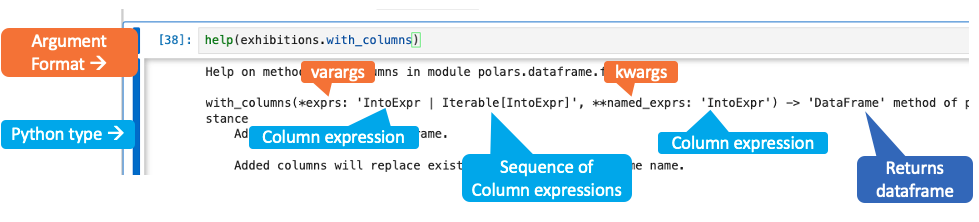

## Using comprehensions and `lambda` functions to automate the process

Let's look at cleaning up the replicated code with some abstractions:

1. Replacing the replicated `polars` expression with a `lambda`,
2. Using a `list` comprehension to represent the sequence of expressions, and
3. Abstracting the sequence using a `lambda`.

#### Abstracting the expression with a `lambda`

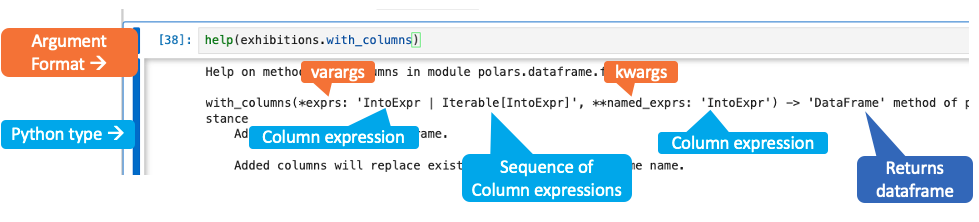

In [66]:
lbl_indicator_alias = lambda col, lbl: (pl.when(pl.col(col) == lbl)
                                        .then(pl.lit(1))
                                        .otherwise(pl.lit(0))
                                        .alias(lbl)
                                       )

#### Abstracting the sequence of expressions with a comprehension

In [68]:
[lbl_indicator_alias('ExhibitionRole', lbl) for lbl in exhibitions['ExhibitionRole'].unique() if lbl is not None]

[<Expr ['.when([(col("ExhibitionRole"))…'] at 0x125982F00>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x125966EA0>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x125964140>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x125966F00>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1256E4410>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1256E44A0>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1256E4770>]

In [69]:
# Input a list of expressions
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns([lbl_indicator_alias('ExhibitionRole', lbl) for lbl in exhibitions['ExhibitionRole'].unique() if lbl is not None]
              )
 .head(5)
)
                                                    

ExhibitionRole,Competition Judge,Installer,Preparer,Designer,Curator,Artist,Arranger
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",0,0,0,0,1,0,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0


In [71]:
# Unpack the positional arguments
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(*[lbl_indicator_alias('ExhibitionRole', lbl) for lbl in exhibitions['ExhibitionRole'].unique() if lbl is not None]
              )
 .head(5)
)

ExhibitionRole,Curator,Preparer,Installer,Designer,Competition Judge,Artist,Arranger
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",1,0,0,0,0,0,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0


#### Abstracting the sequence of expressions with a `lambda`

In [73]:
one_hot_w_alias = lambda df, col: [lbl_indicator_alias(col, lbl) for lbl in df[col].unique() if lbl is not None]

In [74]:
# Inputting a list of inputs
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(one_hot_w_alias(exhibitions, 'ExhibitionRole')
              )
 .head(5)
)

ExhibitionRole,Designer,Arranger,Curator,Artist,Competition Judge,Installer,Preparer
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",0,0,1,0,0,0,0
"""Artist""",0,0,0,1,0,0,0
"""Artist""",0,0,0,1,0,0,0
"""Artist""",0,0,0,1,0,0,0
"""Artist""",0,0,0,1,0,0,0


In [76]:
# Unpacked as individual arguments
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(*one_hot_w_alias(exhibitions, 'ExhibitionRole')
              )
 .head(5)
)
                                                    

ExhibitionRole,Artist,Preparer,Installer,Designer,Curator,Arranger,Competition Judge
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",0,0,0,0,1,0,0
"""Artist""",1,0,0,0,0,0,0
"""Artist""",1,0,0,0,0,0,0
"""Artist""",1,0,0,0,0,0,0
"""Artist""",1,0,0,0,0,0,0


## Review - The `**` operators

Python functions use the `**` operator to 

1. **Pack** allow the capture of additional keyword arguments in function definitions.
2. **Unpack** unpack a `dict` of keyword arguments in function calls.

Note that these two actions are inverse operations.

#### Defining functions that capturing additional keyword arguments

In [77]:
def f(a, b = None, **kwargs):
    return f"a = {a}, b = {b}, added kw = {kwargs}"

In [78]:
f(2) #kwargs is empty by default.

'a = 2, b = None, added kw = {}'

In [79]:
# kwargs contains all extra kwargs when present.
f(2, Bob = "Tall", Alice = "Not tall") 

"a = 2, b = None, added kw = {'Bob': 'Tall', 'Alice': 'Not tall'}"

#### Unpacking a `dict` of kwargs

In [80]:
f(1, **{'Iverson':'Python', 'Bergen':'R', 'Malone':'Excel'})

"a = 1, b = None, added kw = {'Iverson': 'Python', 'Bergen': 'R', 'Malone': 'Excel'}"

## A WET transformation - keyword arguments

This solution is WET, not DRY, as all 7 of the expressions in mutate are very similar ... if only here was a way to perform these similar expressions all at once ...

In [81]:
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(Curator =          pl.when(pl.col('ExhibitionRole') == 'Curator').then(pl.lit(1)).otherwise(pl.lit(0)),
               Artist =           pl.when(pl.col('ExhibitionRole') == 'Artist').then(pl.lit(1)).otherwise(pl.lit(0)),
               Arranger =         pl.when(pl.col('ExhibitionRole') == 'Arranger').then(pl.lit(1)).otherwise(pl.lit(0)),
               Installer =        pl.when(pl.col('ExhibitionRole') == 'Installer').then(pl.lit(1)).otherwise(pl.lit(0)),
               Competition_Judge = pl.when(pl.col('ExhibitionRole') == 'Competition Judge').then(pl.lit(1)).otherwise(pl.lit(0)),
               Designer =         pl.when(pl.col('ExhibitionRole') == 'Designer').then(pl.lit(1)).otherwise(pl.lit(0)),
               Preparer =         pl.when(pl.col('ExhibitionRole') == 'Prepare').then(pl.lit(1)).otherwise(pl.lit(0)))
 .head(5)
)
                                                    

ExhibitionRole,Curator,Artist,Arranger,Installer,Competition_Judge,Designer,Preparer
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",1,0,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0


In [82]:
lbl_indicator = lambda col, lbl: (pl.when(pl.col(col) == lbl)
                                        .then(pl.lit(1))
                                        .otherwise(pl.lit(0))
                                       )

In [84]:
{lbl: lbl_indicator('ExhibitionRole', lbl) for lbl in exhibitions['ExhibitionRole'] if lbl is not None}

{'Curator': <Expr ['.when([(col("ExhibitionRole"))…'] at 0x125982780>,
 'Artist': <Expr ['.when([(col("ExhibitionRole"))…'] at 0x125701A60>,
 'Arranger': <Expr ['.when([(col("ExhibitionRole"))…'] at 0x125983320>,
 'Installer': <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1252D5010>,
 'Competition Judge': <Expr ['.when([(col("ExhibitionRole"))…'] at 0x125983830>,
 'Designer': <Expr ['.when([(col("ExhibitionRole"))…'] at 0x165FC32C0>,
 'Preparer': <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1259829C0>}

In [86]:
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(**{lbl: lbl_indicator('ExhibitionRole', lbl) for lbl in exhibitions['ExhibitionRole'] if lbl is not None}
              )
 .head(5)
               
)

ExhibitionRole,Curator,Artist,Arranger,Installer,Competition Judge,Designer,Preparer
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",1,0,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0


In [88]:
one_hot_w_keywords = lambda df, col: {lbl: lbl_indicator(col, lbl) for lbl in df[col] if lbl is not None}

In [89]:
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(**one_hot_w_keywords(exhibitions, 'ExhibitionRole')
              )
 .head(5)
               
)

ExhibitionRole,Curator,Artist,Arranger,Installer,Competition Judge,Designer,Preparer
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",1,0,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0
"""Artist""",0,1,0,0,0,0,0


## <font color="red"> Exercise 3.5 </font>

Now suppose we want to make indicator/one-hot columns for each nationality using keyword assignment. Perform the following task.

1. Verify that our current `one_hot_w_keywords` doesn't work on the `Nationality` column and identify the problem (**hint:** spaces),
2. Rework the this function to deal with spaces in the column names, and
3. Use the updated function to perform the desired transformations.

In [164]:
# Your code here